In [3]:
import pandas as pd
df = pd.read_excel("Copy of covid_data.xlsx",usecols = "A:J")

In [4]:
print(df)

             Booking Date    Care Center  Participant Age What Is Your Gender  \
0     2020-10-19 11:45:00  Santa Barbara               57              Female   
1      10/19/2020 Walk-in  Santa Barbara               74              Female   
2     2020-10-19 09:00:00      Creekside               73                Male   
3     2020-10-19 09:15:00      Creekside               41              Female   
4     2020-10-19 00:00:00      Creekside               69                Male   
...                   ...            ...              ...                 ...   
8917  2021-01-12 00:00:00        Colony                66              Female   
8918  2021-01-12 00:00:00        Colony                74                Male   
8919  2021-01-12 00:00:00        Colony                73              Female   
8920  2021-01-14 00:00:00        Colony                67                Male   
8921  2021-01-13 00:00:00       Pinellas               69                Male   

      Address City Address 

In [87]:
import re
pd.set_option('mode.chained_assignment', None)
from datetime import datetime
for i in range(len(df['Booking Date'])):
    if isinstance(df['Booking Date'][i], str):
        #print(df['Booking Date'][i])
        match = re.search(r'(\d+/\d+/\d+)',df['Booking Date'][i]) 
        match2 = re.search(r'(\d+/\d+)',df['Booking Date'][i])
        try:
            df.iloc[i][:1] = match.group(1)
            
        except:
            try:
              
                df['Booking Date'][i] = match2.group(1)+"/2020" 
                
        
            except:
                pass
        
      

In [97]:
for i in range(len(df['Booking Date'])):
    if isinstance(df['Booking Date'][i], str):
        df['Booking Date'][i] = datetime.strptime(df['Booking Date'][i], '%m/%d/%Y').date()
        

In [263]:
df['Booking Date'] = pd.to_datetime(df['Booking Date']).dt.date


In [108]:
count = 0
for i in range(len(df['Result'])):
    if re.match(r'^.*[p|P][o|O][s|S].*',df['Result'][i]):
        df['Result'][i] = "POSITIVE"
    elif re.match(r'^.*[n|N][e|E][g|G].*',df['Result'][i]):
        df['Result'][i] = "NEGATIVE"

In [122]:
no_of_pos = 0
total_tests = 0
for i in range(len(df['Result'])):
    if df['Result'][i] == "POSITIVE":
        no_of_pos += 1
    total_tests += 1
no_of_neg = total_tests - no_of_pos
print("Total no of people tested:",total_tests)
print("Number of positive cases:",no_of_pos)
print("Number of Negative cases:",(total_tests-no_of_pos))

Total no of people tested: 8922
Number of positive cases: 882
Number of Negative cases: 8040


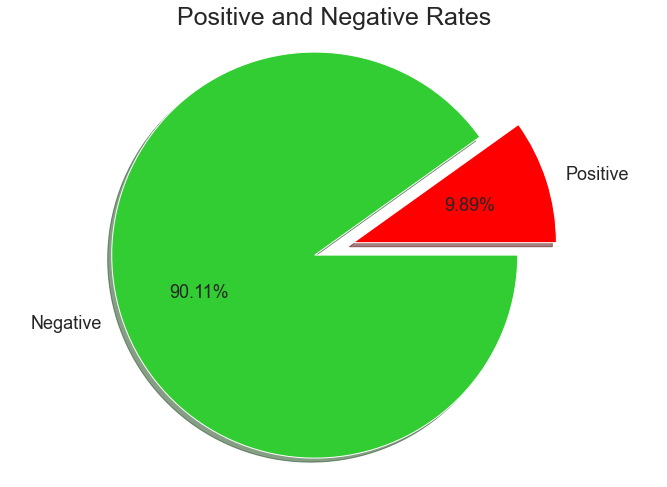

In [199]:
import matplotlib.pyplot as plt

labels= ['Positive', 'Negative']

colors=['red', 'limegreen']

sizes= [no_of_pos,no_of_neg]

plt.pie(sizes,labels=labels, colors=colors, startangle=0, shadow=True,explode=(0.1, 0.1), autopct='%1.2f%%',textprops={'fontsize': 18})

plt.title('Positive and Negative Rates',fontsize=25)

plt.axis('equal')

plt.show()


In [273]:
date_pos = dict()
date_neg = dict()
for i in range(8922):
    if df['Result'][i]=="NEGATIVE":
        if df['Booking Date'][i] in date_neg:
            date_neg[df['Booking Date'][i]] += 1
        else:
            date_neg[df['Booking Date'][i]] = 1
        
    else:
        if df['Booking Date'][i] in date_pos:
            date_pos[df['Booking Date'][i]] += 1
        else:
            date_pos[df['Booking Date'][i]] = 1

print(len(date_pos))
print(len(date_neg))
    

60
72


Text(0, 0.5, 'Number of Positive cases')

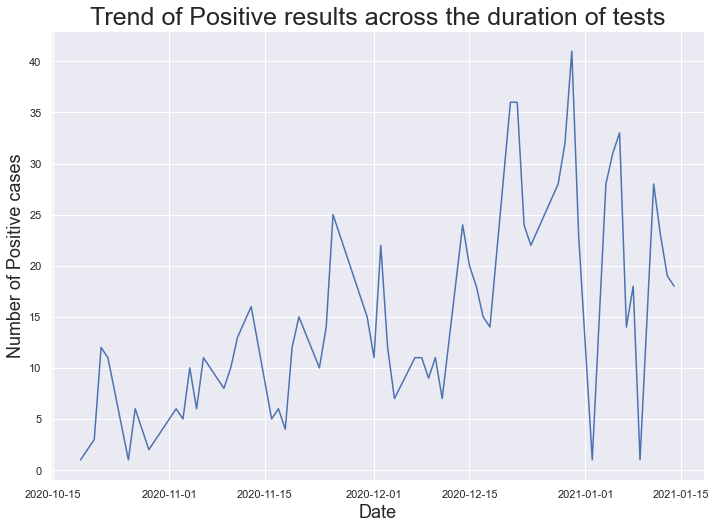

In [272]:
df5 = pd.DataFrame({'date': date_pos.keys(),
                   'value': date_pos.values()})

sns.lineplot(x='date', y='value', data=df5)
plt.title('Trend of Positive results across the duration of tests',fontsize=25)
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Number of Positive cases',fontsize = 18)

In [160]:
tests_in_santa = 0
pos_in_santa = 0
tests_in_creek = 0
pos_in_creek = 0
tests_in_pine = 0
pos_in_pine = 0
tests_in_col = 0
pos_in_col = 0
tests_in_brown = 0
pos_in_brown = 0
tests_in_mulb = 0
pos_in_mulb = 0
tests_in_sharon = 0
pos_in_sharon = 0
tests_in_others = 0
pos_in_others = 0

for i in range(8922):
    k += 1
    if re.match(r'^.*[s|S][a|A][n|N][t|T][a|A].*',df['Care Center'][i]):
        
        tests_in_santa += 1
        if df['Result'][i] == "POSITIVE":
            pos_in_santa += 1
    elif re.match(r'^.*[c|C][r|R][e|E][e|E][k|K].*',df['Care Center'][i]):
        
        tests_in_creek += 1
        if df['Result'][i] == "POSITIVE":
            pos_in_creek += 1
    elif re.match(r'^.*[p|P][i|I][n|N][e|E].*',df['Care Center'][i]):
        
        tests_in_pine += 1
        if df['Result'][i] == "POSITIVE":
            pos_in_pine += 1
    elif re.match(r'^.*[c|C][o|O][l|L].*',df['Care Center'][i]):
        
        tests_in_col += 1
        if df['Result'][i] == "POSITIVE":
            pos_in_col += 1
    elif re.match(r'^.*[b|B][r|R][o|O][w|W][n|N].*',df['Care Center'][i]):
        
        tests_in_brown += 1
        if df['Result'][i] == "POSITIVE":
            pos_in_brown += 1
    elif re.match(r'^.*[m|M][u|U][l|L][b|B].*',df['Care Center'][i]):
        
        tests_in_mulb += 1
        if df['Result'][i] == "POSITIVE":
            pos_in_mulb += 1
    elif re.match(r'^.*[s|S][h|H][a|A][r|R][o|O][n|N].*',df['Care Center'][i]):
        
        tests_in_sharon += 1
        if df['Result'][i] == "POSITIVE":
            pos_in_sharon += 1
    else:
        tests_in_others += 1
        if df['Result'][i] == "POSITIVE":
            pos_in_others += 1
        
print(tests_in_santa)
print(pos_in_santa)
print(tests_in_creek)
print(pos_in_creek)
print(tests_in_pine)
print(pos_in_pine)
print(tests_in_col)
print(pos_in_col)
print(tests_in_brown)
print(pos_in_brown)
print(tests_in_mulb)
print(pos_in_mulb)
print(tests_in_sharon)
print(pos_in_sharon)
print(tests_in_others)
print(pos_in_others)

407
50
3411
322
669
58
337
33
3727
392
298
27
72
0
1
0


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Santa Barbara'),
  Text(1, 0, 'Creekside'),
  Text(2, 0, 'Pinellas'),
  Text(3, 0, 'Colony'),
  Text(4, 0, 'Brownwood'),
  Text(5, 0, 'Mulberry'),
  Text(6, 0, 'Sharon Morse'),
  Text(7, 0, 'Others')])

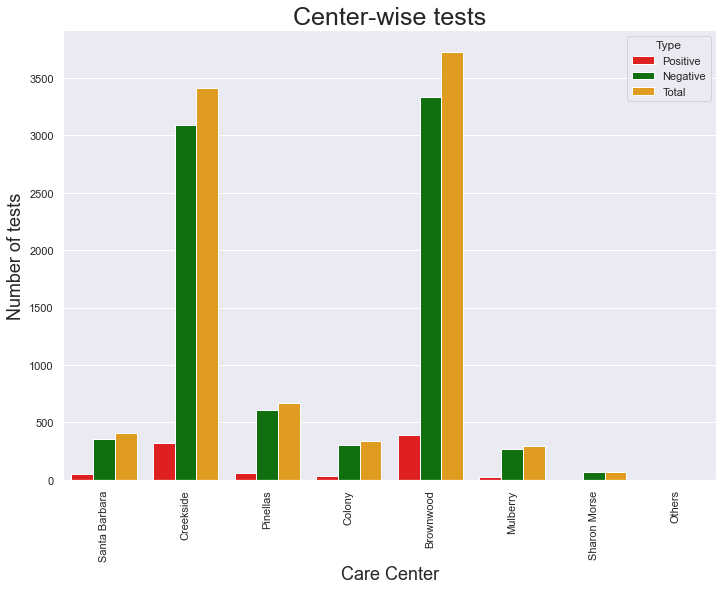

In [205]:
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

df2 = pd.DataFrame({'Care Centers': ['Santa Barbara', 'Creekside', 'Pinellas', 'Colony', 'Brownwood','Mulberry','Sharon Morse','Others','Santa Barbara', 'Creekside', 'Pinellas', 'Colony', 'Brownwood','Mulberry','Sharon Morse','Others','Santa Barbara', 'Creekside', 'Pinellas', 'Colony', 'Brownwood','Mulberry','Sharon Morse','Others'],
                   'Number of tests': [pos_in_santa, pos_in_creek, pos_in_pine, pos_in_col, pos_in_brown,pos_in_mulb,pos_in_sharon,pos_in_others,tests_in_santa-pos_in_santa,tests_in_creek-pos_in_creek, tests_in_pine - pos_in_pine, tests_in_col - pos_in_col, tests_in_brown - pos_in_brown,tests_in_mulb - pos_in_mulb,tests_in_sharon - pos_in_sharon,tests_in_others-pos_in_others,tests_in_santa,tests_in_creek, tests_in_pine, tests_in_col, tests_in_brown,tests_in_mulb,tests_in_sharon,tests_in_others],
                   'Type': ['Positive', 'Positive','Positive','Positive','Positive','Positive','Positive','Positive','Negative','Negative','Negative','Negative','Negative','Negative','Negative','Negative','Total','Total','Total','Total','Total','Total','Total','Total']
                   
                   })

g = sns.barplot(x="Care Centers", y="Number of tests", hue="Type",data = df2,palette=['red', 'green','orange'])
plt.title('Center-wise tests', fontsize=25)
plt.xlabel('Care Center',fontsize=18)
plt.ylabel('Number of tests',fontsize=18)
plt.xticks(rotation=90)


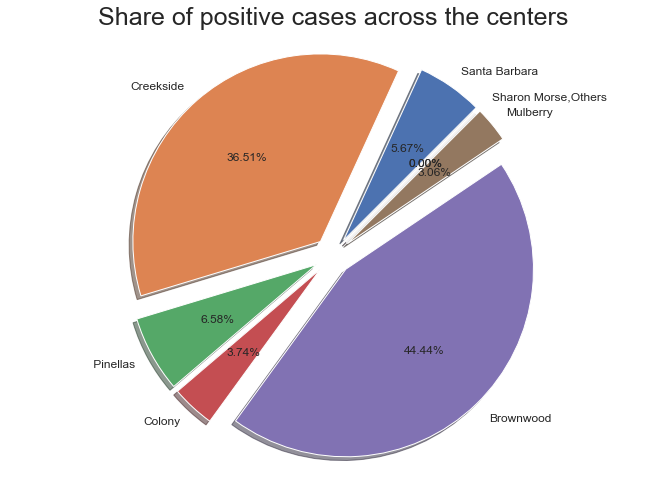

In [197]:
labels= ['Santa Barbara', 'Creekside', ' Pinellas','Colony','Brownwood','Mulberry','Sharon Morse,Others','']


sizes= [pos_in_santa,pos_in_creek,pos_in_pine,pos_in_col,pos_in_brown,pos_in_mulb,pos_in_sharon,pos_in_others]

plt.pie(sizes,labels=labels, startangle=45, shadow=True,explode=(0.1, 0.1,0.1,0.1,0.1,0.1,0.1,0.1), autopct='%1.2f%%',textprops={'fontsize': 12})

plt.title('Share of positive cases across the centers',fontsize=25)

plt.axis('equal')

plt.show()


In [167]:
tested_male = 0
pos_male = 0
tested_female = 0
pos_female = 0
for i in range(8922):
    if df['What Is Your Gender'][i] == 'Male':
        tested_male += 1
        if df['Result'][i] == 'POSITIVE':
            pos_male += 1
    else:
        tested_female += 1
        if df['Result'][i] == 'POSITIVE':
            pos_female += 1
print(tested_male,pos_male)
print(tested_female,pos_female)

3915 435
5007 447


(array([0, 1]), [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

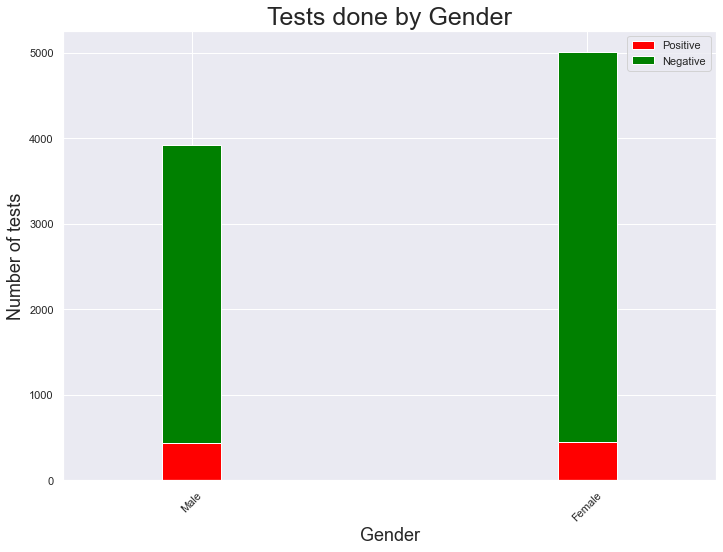

In [202]:
df3 = pd.DataFrame({'Gender': ['Male', 'Female'],
                   'Positive': [435,447],
                   'Negative': [3480,4560]})
df3.set_index('Gender').plot(kind='bar', stacked=True, color=['red', 'green'],width = 0.15)
plt.title('Tests done by Gender', fontsize=25)

plt.xlabel('Gender',fontsize=18)
plt.ylabel('Number of tests',fontsize=18)


plt.xticks(rotation=45)

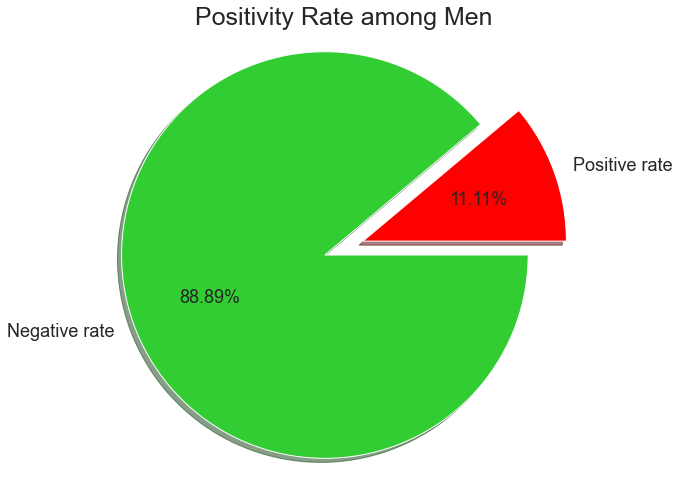

In [192]:
labels= ['Positive rate', 'Negative rate']

colors=['red', 'limegreen']

sizes= [435,3480]

plt.pie(sizes,labels=labels, colors=colors, startangle=0, shadow=True,explode=(0.1, 0.1), autopct='%1.2f%%',textprops={'fontsize': 18})

plt.title('Positivity Rate among Men', fontsize=25)

plt.axis('equal')

plt.show()

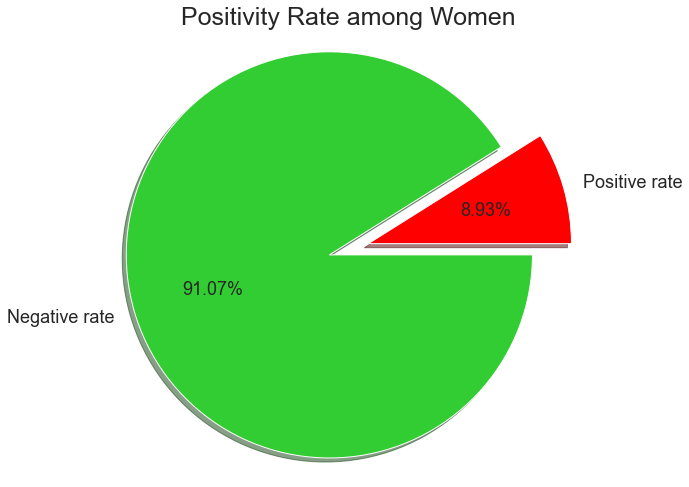

In [193]:
labels= ['Positive rate', 'Negative rate']

colors=['red', 'limegreen']

sizes= [447,4560]

plt.pie(sizes,labels=labels, colors=colors, startangle=0, shadow=True,explode=(0.1, 0.1), autopct='%1.2f%%',textprops={'fontsize': 18})

plt.title('Positivity Rate among Women',fontsize=25)

plt.axis('equal')

plt.show()

In [188]:
infants = 0
pos_infants = 0
children = 0
pos_children = 0
teenagers = 0
pos_teenagers = 0
youngsters = 0
pos_youngsters = 0
adults = 0
pos_adults = 0
senior_adults = 0
pos_senior_adults = 0
for i in range(8922):
    if 0<=df['Participant Age'][i]<=3:
        infants += 1
        if df['Result'][i]=="POSITIVE":
            pos_infants += 1
    elif 4<=df['Participant Age'][i]<=12:
        children += 1
        if df['Result'][i]=="POSITIVE":
            pos_children += 1
    elif 13<=df['Participant Age'][i]<=19:
        teenagers += 1
        if df['Result'][i]=="POSITIVE":
            pos_teenagers += 1
    elif 20<=df['Participant Age'][i]<=29:
        youngsters += 1
        if df['Result'][i]=="POSITIVE":
            pos_youngsters += 1
    elif 30<=df['Participant Age'][i]<=55:
        adults += 1
        if df['Result'][i]=="POSITIVE":
            pos_adults += 1
    else:
        senior_adults += 1
        if df['Result'][i]=="POSITIVE":
            pos_senior_adults += 1
print("Infants tested ", infants)
print("Positive Infants ", pos_infants)
print("Children tested ", children)
print("Positive Children ", pos_children)
print("Teenagers tested ",teenagers)
print("Positive Teenagers ", pos_teenagers)
print("Youngsters tested ",youngsters)
print("Positive Youngsters ", pos_youngsters)
print("Adults tested ",adults)
print("Positive Adults ", pos_adults)
print("Senior adults tested ", senior_adults)
print("Positive Senior Adults ", pos_senior_adults)

Infants tested  19
Positive Infants  4
Children tested  82
Positive Children  9
Teenagers tested  118
Positive Teenagers  13
Youngsters tested  408
Positive Youngsters  27
Adults tested  1161
Positive Adults  109
Senior adults tested  7134
Positive Senior Adults  720


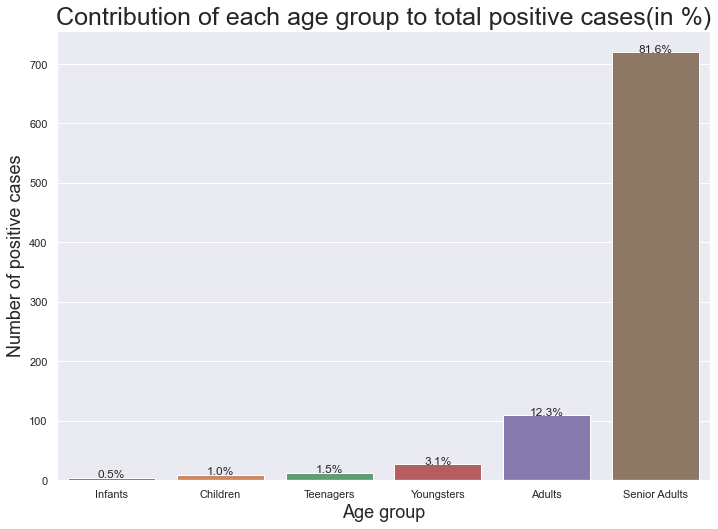

In [209]:
x = ['Infants', 'Children', 'Teenagers', 'Youngsters', 'Adults','Senior Adults']
y = [4, 9, 13, 27, 109, 720]
percentage = [0.45, 1.02, 1.47, 3.06, 12.35,81.63]
ax = sns.barplot(x=x, y=y)
patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.05
   ax.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')
plt.title("Contribution of each age group to total positive cases(in %)",fontsize=25)
plt.xlabel("Age group", fontsize=18)
plt.ylabel("Number of positive cases",fontsize=18)
plt.show()

In [214]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

Text(0, 0.5, 'Age group')

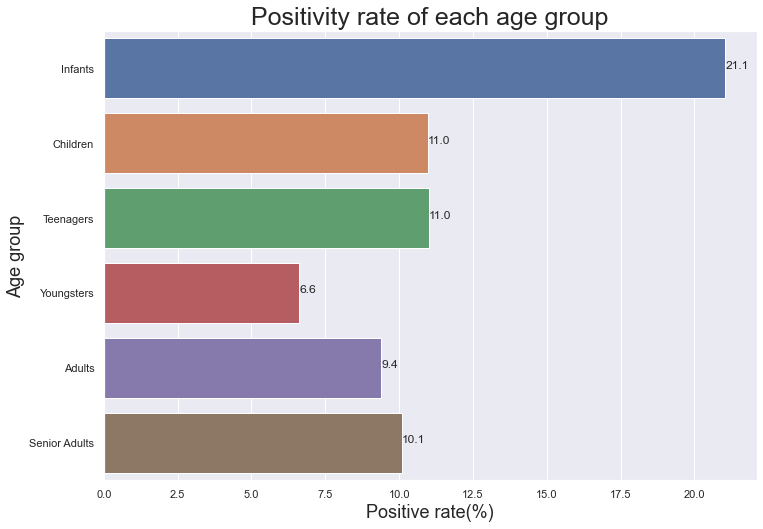

In [218]:
age_group = ['Infants', 'Children', 'Teenagers', 'Youngsters', 'Adults','Senior Adults']
pos_rate = [21.05,10.97,11.02,6.62,9.39,10.09]

p = sns.barplot(x=pos_rate, y=age_group, ci=None)

show_values(p, "h", space=0)
plt.title("Positivity rate of each age group",fontsize=25)
plt.xlabel("Positive rate(%)",fontsize=18)
plt.ylabel("Age group",fontsize=18)

In [244]:
asym_pos = 0
asym_neg = 0
travel_pos = 0
df['COVID Risks'] = df['COVID Risks'].fillna('None')

for i in range(8922):

    if re.match(r'^.*[N|n][O|o][[N|n][E|e]]?.*',df['COVID Risks'][i]) :
        if df['Result'][i]=="POSITIVE":
            asym_pos += 1
        else:
            asym_neg += 1
    elif re.match(r'^.*[A|a][I|i][[R|r].*',df['COVID Risks'][i]) :
        if df['Result'][i]=="POSITIVE":
            travel_pos += 1
        
        
    

sym_pos = no_of_pos - asym_pos
sym_neg = no_of_neg - asym_neg
print(asym_pos)
print(asym_neg)
print(travel_pos)     


251
4856
37


(array([0, 1]), [Text(0, 0, 'Positive'), Text(1, 0, 'Negative')])

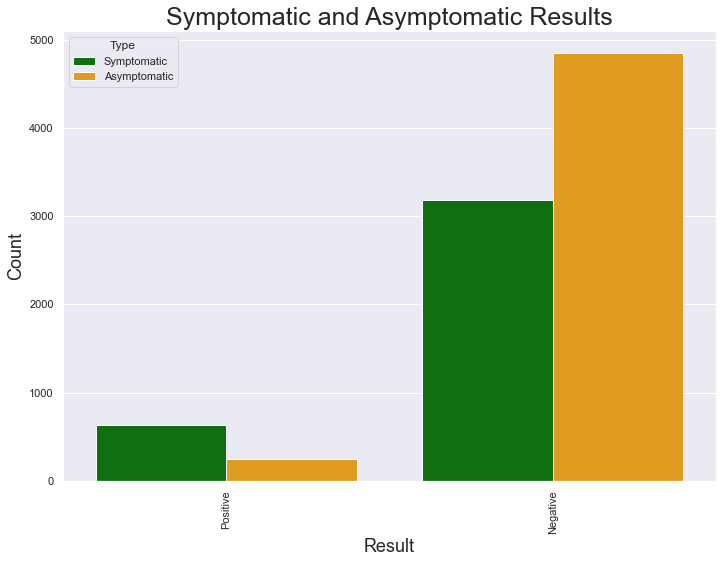

In [242]:
df4 = pd.DataFrame({'Result': ['Positive', 'Negative', 'Positive', 'Negative'],
                   'Count': [631, 3184, 251, 4856],
                   'Type': ['Symptomatic', 'Symptomatic','Asymptomatic','Asymptomatic']
                   
                   })

g = sns.barplot(x='Result', y='Count', hue='Type',data = df4,palette=['green','orange'])
plt.title('Symptomatic and Asymptomatic Results', fontsize=25)
plt.xlabel('Result',fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.xticks(rotation=90)


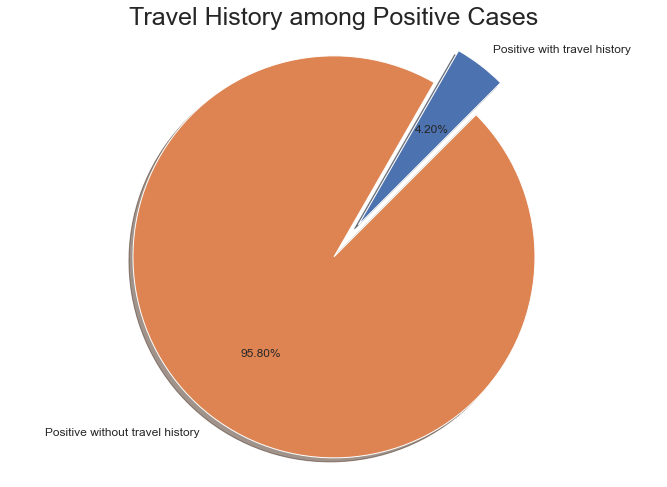

In [245]:
labels= ['Positive with travel history', 'Positive without travel history']


sizes= [37,845]

plt.pie(sizes,labels=labels, startangle=45, shadow=True,explode=(0.1, 0.1), autopct='%1.2f%%',textprops={'fontsize': 12})

plt.title('Travel History among Positive Cases',fontsize=25)

plt.axis('equal')

plt.show()


In [247]:
alone_pos = 0
df['Living Arrangement'] = df['Living Arrangement'].fillna('None')

for i in range(8922):
    if re.match(r'^.*[A|a][L|l][O|o][[N|n][E|e]]?.*',df['Living Arrangement'][i]) :
        if df['Result'][i]=="POSITIVE":
            alone_pos += 1
print(alone_pos)     


81


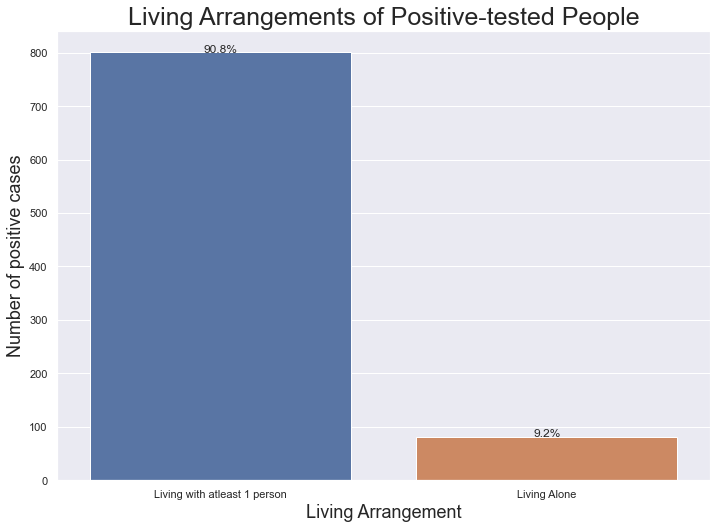

In [248]:
x = ['Living with atleast 1 person', 'Living Alone']
y = [801,81]
percentage = [90.8,9.2]
ax = sns.barplot(x=x, y=y)
patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.05
   ax.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')
plt.title("Living Arrangements of Positive-tested People",fontsize=25)
plt.xlabel("Living Arrangement", fontsize=18)
plt.ylabel("Number of positive cases",fontsize=18)
plt.show()